<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [99]:
import pandas as pd
import psycopg2
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")


In [100]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [101]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [102]:
query_3_1 = f'''select *
           from public.vacancies
'''

In [103]:
df_vacancies = pd.read_sql_query(query_3_1, connection)
len(df_vacancies)

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [104]:
query_3_2 = f'''select *
           from public.employers
'''

In [105]:
df_employers = pd.read_sql_query(query_3_2, connection)
len(df_employers)

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [106]:
query_3_3 = f'''select *
           from public.areas
'''

In [107]:
df_areas = pd.read_sql_query(query_3_3, connection)
len(df_areas)

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [108]:
query_3_4 = f'''select *
           from public.industries
'''

In [109]:
df_industries = pd.read_sql_query(query_3_4, connection)
len(df_industries)

294

***

Анализируем почти 50 000 вакансий в более 1000 регионах, в среднем на одного работодателя приходится по 2 вакансии. Предложения касаются около 300 сфер.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [110]:
query_4_1 = f'''select count(v.id) cnt,
                a.name area
                from public.vacancies v
                    join public.areas a on a.id = v.area_id
                group by a.name
                order by 1 desc
'''

In [111]:
df = pd.read_sql_query(query_4_1, connection)
df

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [112]:
query_4_2 = f'''select count(*)
                from public.vacancies
                where salary_from is not null
                    or salary_to is not null
'''

In [113]:
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [114]:
query_4_3 = f'''select avg(salary_from) avg_min,
                    avg(salary_to) avg_max
                from public.vacancies
'''

In [115]:
df = pd.read_sql_query(query_4_3, connection)
df

,avg_min,avg_max
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [116]:
query_4_4 = f'''select distinct schedule ,
                    employment,
                    count(*)
                from public.vacancies 
                group by 1,2
                order by 3 desc
                limit 10
'''

In [117]:
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [118]:
query_4_5 = f'''select count(experience),
                experience
                from public.vacancies 
                group by experience
                order by 1 asc
'''

In [119]:
df = pd.read_sql_query(query_4_5, connection)
df

,count,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

Наибольшее количество вакансий состредоточено в столицах и крупнейших городах стран. Далеко не каждый работодатель описывает пределы ЗП, а меньше половины, при этом средняя вилка 70-110k. 70% вакансий ищут сотрудника полного рабочего дня и занятости, удаленная работа для 16% вакансий. Почти половина заявок на работников с опытом 1-3лет, треть 3-6 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [120]:
query_5_1 = f'''select count(v.id),
                e.name
                from public.employers e
                    join public.vacancies v on v.employer_id=e.id
                group by 2
                order by 1 desc
                limit 5
'''

In [121]:
df = pd.read_sql_query(query_5_1, connection)
df

,count,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [122]:
query_5_2 = f'''select a.name area,
                    count(distinct e.id) empl_cnt,
                    count(v.id) vac_cnt
                from public.areas a
                    left join public.vacancies v on a.id = v.area_id
                    left join public.employers e on e.area = a.id
                where v.id is null
                group by a.name
                order by 2 desc
'''

In [123]:
df = pd.read_sql_query(query_5_2, connection)
df

,area,empl_cnt,vac_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [124]:
query_5_3 = f'''select e.name,
                    count(distinct v.area_id) area_cnt
                from public.employers e
                    left join public.vacancies v on e.id = v.employer_id
                group by e.name
                order by 2 desc
'''

In [125]:
df = pd.read_sql_query(query_5_3, connection)
df

,name,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [126]:
query_5_4 = f'''select count(e.name)
                from public.employers e
                    left join public.employers_industries ei on e.id=ei.employer_id
                    left join public.industries i on ei.industry_id = i.id
                where i.name is null
'''

In [127]:
df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [128]:
query_5_5 = f'''select e.name
                from public.employers e
                    left join public.employers_industries ei on e.id=ei.employer_id
                    left join public.industries i on ei.industry_id = i.id
                group by 1
                having count(i.id)=4              
                order by 1 asc
                offset 2
                limit 1
'''

In [129]:
df = pd.read_sql_query(query_5_5, connection)
df

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [130]:
query_5_6 = f'''select count(e.name)
                from public.employers e
                    left join public.employers_industries ei on e.id=ei.employer_id
                    left join public.industries i on ei.industry_id = i.id
                where i.name = 'Разработка программного обеспечения'              
'''

In [131]:
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [132]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
response = requests.get('https://ru.wikipedia.org/wiki/Города-миллионеры_России')
soup = BeautifulSoup(response.content, 'html.parser') 

dom = etree.HTML(str(soup))
cities = []
tbody = soup.find('tbody').text

for i in range(2, len(tbody.split('%'))+1):
    result = dom.xpath(f'//*[@id="mw-content-text"]/div[1]/table[1]/tbody/tr[{i}]/td[2]/a')
    cities.append(result[0].text)
print(cities)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [133]:
query_5_7 = f'''select a.name,
                    count(v.id) cnt
                from public.vacancies v
                    left join public.employers e on v.employer_id=e.id
                    left join public.areas a on v.area_id = a.id
                where e.name = 'Яндекс' 
                and a.name in {tuple(cities)}
                group by a.name

                union 
                select 'Total',
                    count(*)
                from public.vacancies v
                    left join public.employers e on v.employer_id=e.id
                    left join public.areas a on v.area_id = a.id
                where e.name = 'Яндекс' 
                and a.name in {tuple(cities)}

                order by 2 asc   
 
'''

In [134]:
df = pd.read_sql_query(query_5_7, connection)
df

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

Наиболее активным поиском работников занимается Яндекс(около 2000), затем Ростелеком, Тинькофф, СБЕР(около 400). Около 17% вакансий не указывают сферу деятельности. 7% ищут Разработчиков ПО. Города-миллионики получают от Яндекса от 20 до 54 вакансий.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [135]:
query_6_1 = f'''select count(v.name)
                from public.vacancies v
                where lower(v.name) like '%data%'
                or lower(v.name) like '%данн%'             
'''

In [136]:
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [137]:
query_6_2 = f'''select count(v.id)
                from public.vacancies v
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name ilike '%ML%' and v.name not ilike '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%')    
                    
                    and (v.name ilike '%junior%' 
                    or v.experience ilike 'Нет опыта'
                    or employment ilike 'Стажировка%')    
'''

In [138]:
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [139]:
query_6_3 = f'''select count(v.id)
                from public.vacancies v
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name ilike '%ML%' and v.name not ilike '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%')    
                    
                    and (v.key_skills ilike '%sql%'
                    or v.key_skills ilike '%postgres%')    
'''

In [140]:
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [141]:
query_6_4 = f'''select count(v.id)
                from public.vacancies v
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name ilike '%ML%' and v.name not ilike '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%')    
                    
                    and v.key_skills ilike '%python%'   
'''

In [142]:
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [143]:
def to_count(skill):
    count = len(skill)-len(skill.replace('\t', '')) +1
    return count

In [144]:
query_6_5 = f'''select v.key_skills 
                from public.vacancies v
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name like '%ML%' and v.name not like '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%') 
                    and v.key_skills is not null
                      
'''

In [145]:
df = pd.read_sql_query(query_6_5, connection)
df1= df['key_skills'].apply(to_count)
df1.describe()

count    431.000000
mean       6.406032
std        3.023145
min        1.000000
25%        5.000000
50%        5.000000
75%        8.000000
max       20.000000
Name: key_skills, dtype: float64

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [146]:
query_6_6 = f'''select distinct v.experience,
                avg(coalesce((v.salary_to + v.salary_from)/2, v.salary_from, v.salary_to, 0))
                from public.vacancies v
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name like '%ML%' and v.name not like '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%') 

                    and (v.salary_to is not null
                    or v.salary_from is not null)
                    
                group by v.experience
                      
'''

In [147]:
df = pd.read_sql_query(query_6_6, connection)
df

,experience,avg
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

Рынок вакансий для DS-специалиста весьма радушен - 3.6% из всех, однако для начинающих ситуация более конкурентная. Хоть работодатели указывают и немало ключевых навыков (примерно 6), но удивительно, что изученные на курсе инструменты не так часто встречаются. К моменту исследования ЗП кратно растет с опытом кандидата.

# Общий вывод по проекту

На портале HeadHunter.ru на момент исследования было опубликовано около 50k вакансий от работодателей из СНГ, преимущественно РФ. Однако по зарплатным ожиданиям может соориентировать едва ли половина. Более 70% вакансий ищет сотрудника на полную занятость и полный рабочий день, следом идет удаленная работа и прочие. 

Каким бы удивительным не казалось, половины в поиске работника с опытом от 1 года до 3 лет, чуть больше трети - от 3 до 6 лет. Можно предположить, что ценные и опытные кадры перехватывают до поиска вакансий в интернете. Или же, напротив, такие высокие требования могут спугнуть амбициозных, но менее опытных кандидатов.

Среди наиболее активных работодателей с 4-кратным отрывом лидирует Яндекс, они же представлены в наибольшем количестве регионов, что объясняется сферой их деятельности.

Лишь 0.1% из всех вакансий относятся к начинающим data-scientistам. Оптимистично растет ЗП в этой сфере, кратно увеличивая коофециент при переходе в новую категорию опыта, согласно указанной зарплатной вилке.

Text(0.5, 1.0, 'Взаимосвязь опыта, занятости и старта ЗП для кандидатов')

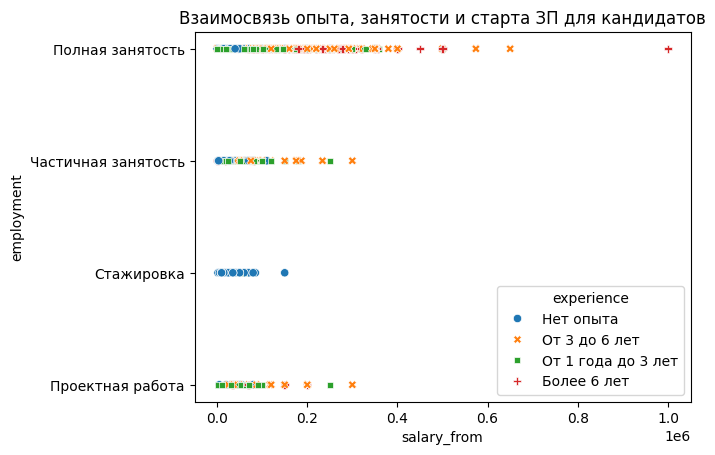

In [148]:
sn.scatterplot(df_vacancies, 
            x='salary_from', 
            y='employment', 
            hue='experience', 
            style='experience').set_title('Взаимосвязь опыта, занятости и старта ЗП для кандидатов')

Как ожидалось, стажировку предлагают только сотрудникам без опыта, при этом начальная ЗП наименьшая среди прочих. 

Для проектной работы в основном рассматривают кандидатов от 1 года до 6 лет опыта, старт ЗП схож со стажировкой и несколько выше. 

Частичную занятость в равной степени предлагают кандидатам любого опыта, кроме самых опытных. 

Полная занятость подходит для всех кандидатов, причем старт ЗП соотносится с опытом работника.